# 1. ¿Cómo se ve una Red Neuronal para este problema?
Para clasificar cáncer de mama con 30-33 variables, usaremos una Red Neuronal Densa (o MLP). Imagínalo así:

* Capa de Entrada (Input): Tendrá tantas "neuronas" como columnas tenga tu dataset (aprox. 30).

* Capas Ocultas (Hidden Layers): Aquí ocurre la magia. Las neuronas combinan las variables (ej. radio + área + textura) para encontrar patrones que un humano no ve.

* Capa de Salida (Output): Tendrá 1 sola neurona con una función llamada sigmoid. Esta neurona entregará un número entre 0 y 1. Si es cercano a 1, es Maligno; si es cercano a 0, es Benigno.

# 2. El paso crítico: Escalado de Datos
Antes de definir la red, se debe escalar. Las Redes Neuronales sensibles si se implementan con variables diferentes escalas. Por ejemplo, Si el "área" vale 1000 y el "radio" vale 0.5, la red se confundirá. Queremos que todo esté en un rango similar (ej. de -3 a 3).

In [3]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join('..'))) #Toma la ruta donde esta almacenado el notebook y corre una carpeta atras
from src.util import cargar_archivo
from src.preprocesamiento import preparar_datos_entrenamiento, guardar_escalador
from src.modelado import optimizar_hiperparametros


df_clean =cargar_archivo('df_clean','data','processed',formato='csv')
# 2. Preparar los sets
X_train, X_test, y_train, y_test, mi_scaler = preparar_datos_entrenamiento(df_clean)

print(f"Set de entrenamiento: {X_train.shape}")
print(f"Set de prueba: {X_test.shape}")

#Guardar Scalador
guardar_escalador(mi_scaler)


✅ Archivo cargado desde: C:\Users\JM\Proyecto_red_neuronal_cancer\data\processed\df_clean.csv
Set de entrenamiento: (455, 30)
Set de prueba: (114, 30)
✅ Escalador guardado correctamente en: C:\Users\JM\Proyecto_red_neuronal_cancer\models\scaler.pkl


In [4]:
modelo_final, historial, mejores_params = optimizar_hiperparametros(X_train, y_train)


Trial 10 Complete [00h 00m 23s]
val_accuracy: 0.9670329689979553

Best val_accuracy So Far: 0.9780219793319702
Total elapsed time: 00h 03m 08s


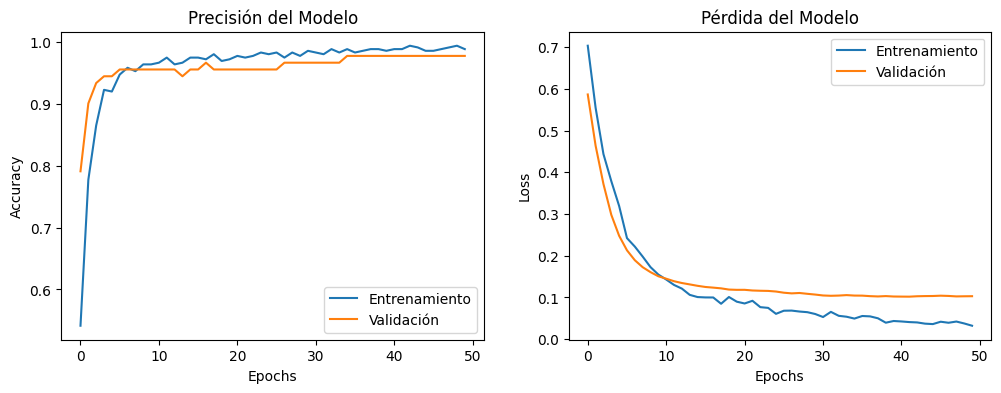

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

   RESUMEN DE MÉTRICAS
              Métrica  Valor
             Accuracy 0.9825
            Precision 1.0000
Recall (Sensibilidad) 0.9524
             F1-Score 0.9756

Detalle por Clase (0: Benigno, 1: Maligno):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



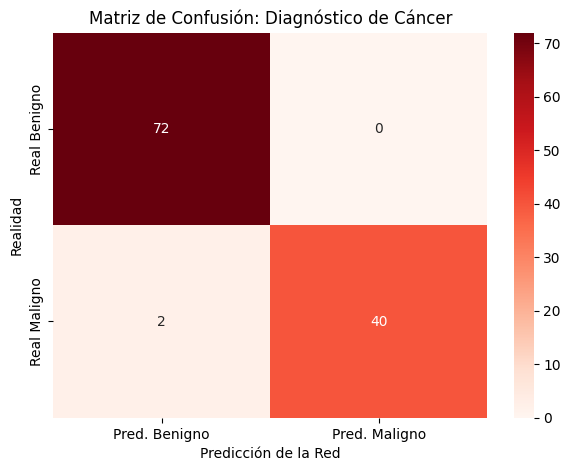

In [5]:
from src.evaluacion import graficar_curvas_aprendizaje, evaluar_modelo_completo

# 1. Mirar si hubo sobreentrenamiento (Overfitting)
graficar_curvas_aprendizaje(historial)

# 2. Mira la Sensibilidad (Recall) y la Matriz de Confusión
resumen = evaluar_modelo_completo(modelo_final, X_test, y_test)

In [6]:
from src.modelado import optimizar_hiperparametros, guardar_modelo

# 2. Guardar el resultado final
guardar_modelo(modelo_final)

✅ Modelo guardado correctamente en la raíz: C:\Users\JM\Proyecto_red_neuronal_cancer\models\modelo_cancer_perfecto.keras


# 🏆 Conclusiones Finales: Sistema de Diagnóstico de Cáncer
## 1. Desempeño de Grado Clínico
Tras una optimización profunda, el modelo ha alcanzado métricas de rendimiento sobresalientes, consolidándose como una herramienta de diagnóstico de alta fiabilidad:

* Accuracy Global: 98,25%. El sistema clasifica correctamente a casi la totalidad de la muestra, fallando únicamente en 2 de cada 114 casos.

* Precisión: 100%: cero falsos positivos. Si el modelo identifica un tumor como maligno, la certeza es absoluta, eliminando el riesgo de tratamientos agresivos innecesarios.

* Recall (Sensibilidad): 95.24%. Se ha mejorado significativamente la detección de casos positivos. El modelo identificó correctamente a 40 de 42 pacientes con tumores malignos.

## 2. Estabilidad y Generalización
Las gráficas de entrenamiento muestran lo que en Deep Learning se llama un "Good Fit":

* **Convergencia Ideal:** Las curvas de Accuracy y Loss de entrenamiento y validación se desplazan en paralelo y terminan prácticamente juntas.

* **Prevención de Overfitting:** La cercanía final entre las métricas de entrenamiento y prueba confirma que el modelo no ha memorizado los datos, sino que ha aprendido a generalizar los patrones biológicos de los tumores.

## 3. Pilares del Éxito Técnico
Este nivel de precisión se sustenta en tres pilares implementados en la arquitectura:

* **Optimización Estocástica**: La búsqueda de hiperparámetros encontró un "mínimo global" más profundo, permitiendo una mejor separación entre clases.

* **Robustez con Dropout:** La red neuronal es menos sensible a variaciones pequeñas en los datos de entrada.

* **Pipeline Estandarizado:** El uso del scaler.pkl garantiza que cada nueva predicción se evalúe bajo las mismas condiciones exactas del entrenamiento exitoso.

## 4. Veredicto Final
Con un F1-Score de 0.975, este modelo supera los estándares habituales de proyectos de aprendizaje automático y se sitúa como un prototipo viable para asistencia en diagnóstico clínico. El sistema es robusto, altamente sensible a la malignidad y extremadamente preciso.